In [201]:
words = open('names.txt', 'r').read().split('\n')

len(words)

32033

In [202]:
min([len(word) for word in words])

2

In [203]:
max([len(word) for word in words])

15

In [204]:
bigram_freq = {}
for word in words:
    chs = ['.'] + list(word) + ['.']
    for bigram in zip(chs, chs[1:]):
        bigram_freq[bigram] = bigram_freq.get(bigram, 0) + 1

sorted(bigram_freq.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [205]:
# simple character-set encoding: indexed base.
charset = sorted(list(set(''.join(words))))

stoi = {char:i for i,char in enumerate(charset)}
stoi['.'] = 26

itos = {i: char for char, i in stoi.items()}

In [208]:
charset_len = len(stoi)

In [210]:
import torch

# rank-2 tensor, aka 2d array
N = torch.zeros(charset_len, charset_len, dtype=int)

for bigram, freq in bigram_freq.items():
    ch1 = bigram[0]
    ch2 = bigram[1]
    N[stoi[ch1], stoi[ch2]] = freq


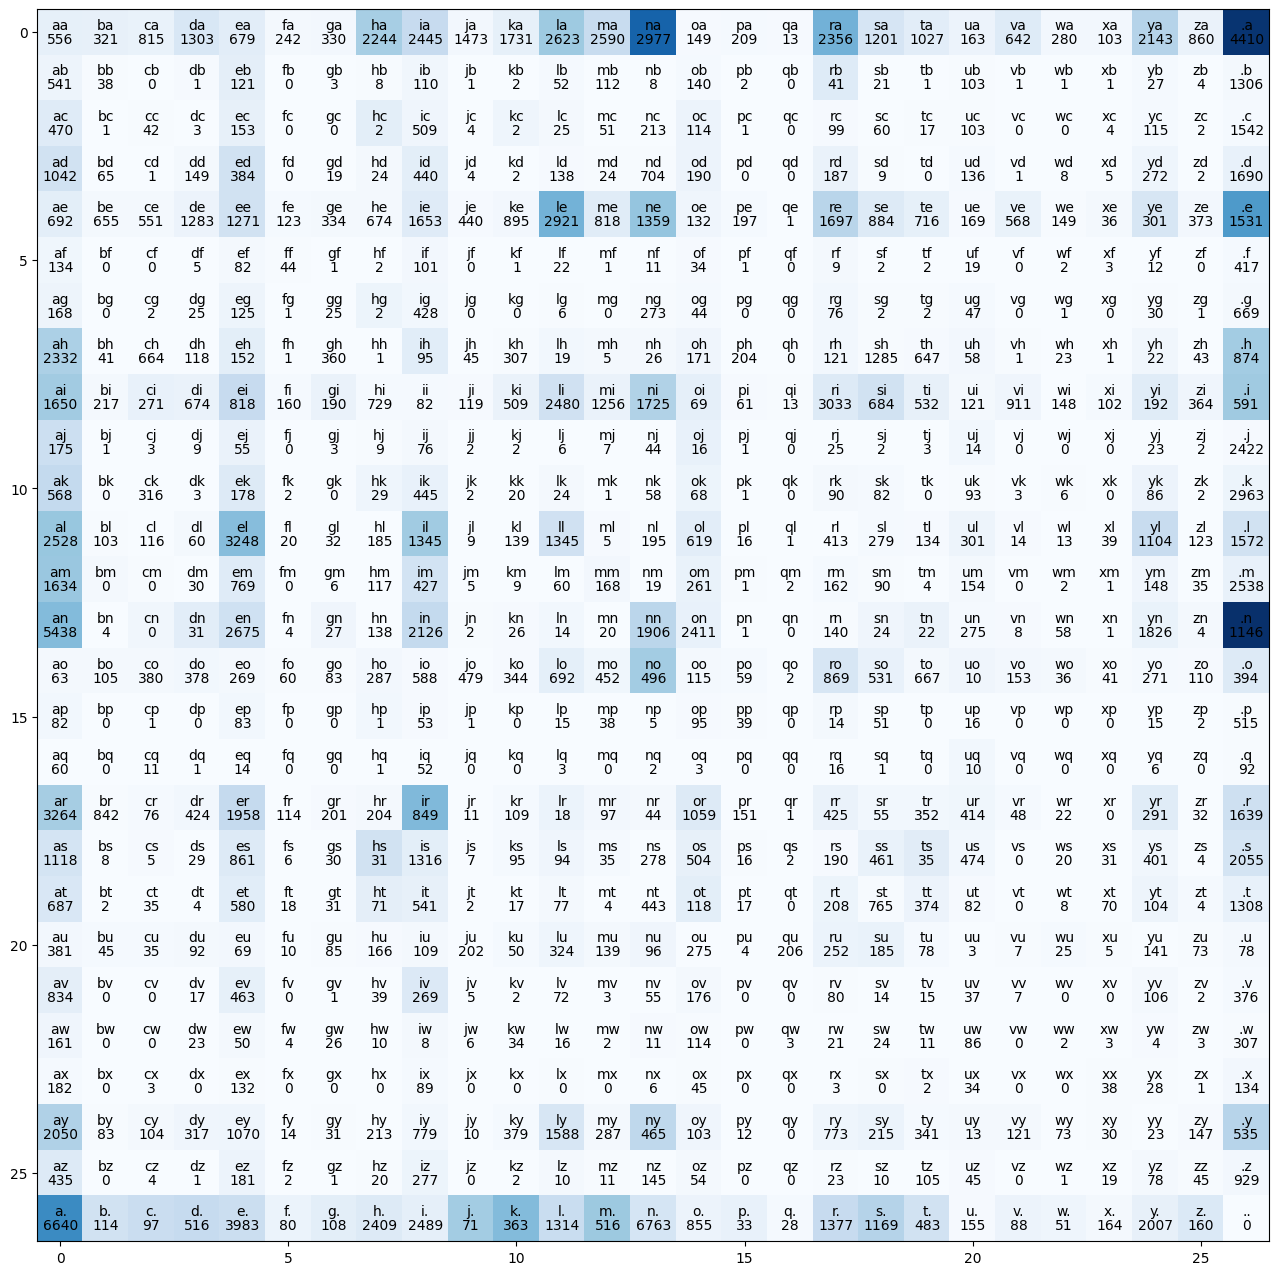

In [211]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for x in range(len(N)):
    for y in range(len(N)):
        bigram = itos[x] + itos[y]
        freq = N[x, y].item()
        plt.text(x, y, bigram, ha= 'center', va = 'bottom')
        plt.text(x, y, freq, ha =  'center', va = 'top')